<a href="https://colab.research.google.com/github/shylitboi/Personal-Project/blob/main/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 코랩에서 한글 출력되도록
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/씀씀이🌐/ILI/data/INF_B 전처리.csv")
df

,COUNTRY,DATE,YEAR,WEEK,YEAR_WEEK,INF_B,cycle,weekx,weeky,occur_t-0,...,occur_t-43,occur_t-44,occur_t-45,occur_t-46,occur_t-47,occur_t-48,occur_t-49,occur_t-50,occur_t-51,occur_t-52
0,Afghanistan,2014-01-05,2014,1,2014_01,0.0,52,0.597109,0.802160,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,Afghanistan,2014-01-12,2014,2,2014_02,0.0,52,0.957954,0.286923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,Afghanistan,2014-01-19,2014,3,2014_03,0.0,52,0.939757,-0.341844,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,Afghanistan,2014-01-26,2014,4,2014_04,0.0,52,0.549718,-0.835351,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,Afghanistan,2014-02-02,2014,5,2014_05,0.0,52,-0.057833,-0.998326,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63940,"occupied Palestinian territory, including east...",2025-03-30,2025,13,2025_13,0.0,17,-0.919197,0.393799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.000000,0.000000
63941,"occupied Palestinian territory, including east...",2025-04-06,2025,14,2025_14,0.0,17,0.917154,0.398534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.045455,0.000000
63942,"occupied Palestinian territory, including east...",2025-04-13,2025,15,2025_15,0.0,17,-0.339326,-0.940669,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.045455
63943,"occupied Palestinian territory, including east...",2025-04-20,2025,16,2025_16,0.0,17,-0.451528,0.892257,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
df.columns

Index(['COUNTRY', 'DATE', 'YEAR', 'WEEK', 'YEAR_WEEK', 'INF_B', 'cycle',
       'weekx', 'weeky', 'occur_t-0', 'occur_t-1', 'occur_t-2', 'occur_t-3',
       'occur_t-4', 'occur_t-5', 'occur_t-6', 'occur_t-7', 'occur_t-8',
       'occur_t-9', 'occur_t-10', 'occur_t-11', 'occur_t-12', 'occur_t-13',
       'occur_t-14', 'occur_t-15', 'occur_t-16', 'occur_t-17', 'occur_t-18',
       'occur_t-19', 'occur_t-20', 'occur_t-21', 'occur_t-22', 'occur_t-23',
       'occur_t-24', 'occur_t-25', 'occur_t-26', 'occur_t-27', 'occur_t-28',
       'occur_t-29', 'occur_t-30', 'occur_t-31', 'occur_t-32', 'occur_t-33',
       'occur_t-34', 'occur_t-35', 'occur_t-36', 'occur_t-37', 'occur_t-38',
       'occur_t-39', 'occur_t-40', 'occur_t-41', 'occur_t-42', 'occur_t-43',
       'occur_t-44', 'occur_t-45', 'occur_t-46', 'occur_t-47', 'occur_t-48',
       'occur_t-49', 'occur_t-50', 'occur_t-51', 'occur_t-52'],
      dtype='object')

모든 국가의 데이터는 country_dfs 딕셔너리에 저장되어 있음

각 국가 데이터에는 occur_t-0 ~ occur_t-52 컬럼이 존재함

한국 데이터는 "Republic of Korea"라는 키로 저장되어 있음

# 국가별 유사도 측정

## 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_full_pattern(df, korea_series_col="INF_B"):
    results = []

    # 1. 한국 INF_B 시계열 전체 추출 (flatten)
    korea_df = df[df["COUNTRY"] == "Republic of Korea"]
    korea_vector = korea_df[korea_series_col].dropna().values.reshape(1, -1)

    # 2. 모든 외국 국가에 대해 occur_t-0 ~ t-52 시계열 추출
    countries = df["COUNTRY"].unique()
    countries = [c for c in countries if c != "Republic of Korea"]

    for country in countries:
        sub = df[df["COUNTRY"] == country]

        for lag in range(53):
            colname = f"occur_t-{lag}"
            if colname not in sub.columns:
                continue

            series = sub[colname].dropna().values.reshape(1, -1)
            min_len = min(korea_vector.shape[1], series.shape[1])
            if min_len < 10:
                continue

            # 길이 맞춰서 계산
            korea_trimmed = korea_vector[0][-min_len:].reshape(1, -1)
            foreign_trimmed = series[0][-min_len:].reshape(1, -1)

            sim = cosine_similarity(korea_trimmed, foreign_trimmed)[0][0]
            results.append({
                "country": country,
                "lag": lag,
                "cosine_similarity": sim,
                "length_used": min_len
            })

    return pd.DataFrame(results).sort_values("cosine_similarity", ascending=False).head(10)
# 실행
top10_full_pattern = cosine_similarity_full_pattern(df)

# 결과 확인
print(top10_full_pattern)

        country  lag  cosine_similarity  length_used
3392      Japan    0           0.736677          435
3393      Japan    1           0.690914          435
191   Argentina   32           0.663167          435
190   Argentina   31           0.661129          435
1113     Canada    0           0.660342          435
3394      Japan    2           0.651385          435
189   Argentina   30           0.645607          435
192   Argentina   33           0.642485          435
1325      China    0           0.630938          435
188   Argentina   29           0.620975          435


In [ ]:
top10_full_pattern.to_csv("cosine.csv", index=False)

## DTW

In [ ]:
pip install fastdtw

In [ ]:
from fastdtw import fastdtw
import pandas as pd

# 한국 시계열 (occur_t-0만 사용)
korea_series = df[df['COUNTRY'] == 'Republic of Korea'].sort_values(by='DATE')['occur_t-0'].to_numpy()

# 유사도 저장
dtw_scores = {}

# 모든 국가 추출
countries = df['COUNTRY'].unique()

for country in countries:
    if country == 'Republic of Korea':
        continue

    # 해당 국가의 시계열 추출
    country_series = df[df['COUNTRY'] == country].sort_values(by='DATE')['occur_t-0'].to_numpy()

    # 길이가 다르면 비교하지 않음
    if len(country_series) != len(korea_series):
        print(f"Skipping {country} due to length mismatch")
        continue

    # DTW 거리 계산 (수정된 부분)
    # dist 인자에 두 숫자의 거리를 계산하는 lambda 함수를 전달합니다.
    distance, _ = fastdtw(korea_series, country_series, dist=lambda x, y: abs(x - y))
    dtw_scores[country] = distance

# 결과 정리
dtw_df = pd.DataFrame.from_dict(dtw_scores, orient='index', columns=['dtw_distance'])
dtw_df = dtw_df.sort_values(by='dtw_distance', ascending=True)

# 상위 50개국 출력
print(dtw_df.head(50))

                                  dtw_distance
Japan                                21.574575
United Kingdom, Scotland             22.412997
Canada                               22.833219
United States of America             26.109242
Slovenia                             26.464304
Norway                               26.473626
Germany                              27.560578
Togo                                 27.804887
Kazakhstan                           27.956612
Croatia                              27.997682
Türkiye                              28.254462
Switzerland                          28.756831
Ghana                                28.982684
Sweden                               29.350808
Russian Federation                   29.357157
Oman                                 29.419676
Nigeria                              29.592680
Iceland                              29.648321
Ukraine                              29.654018
China                                29.711060
Serbia       

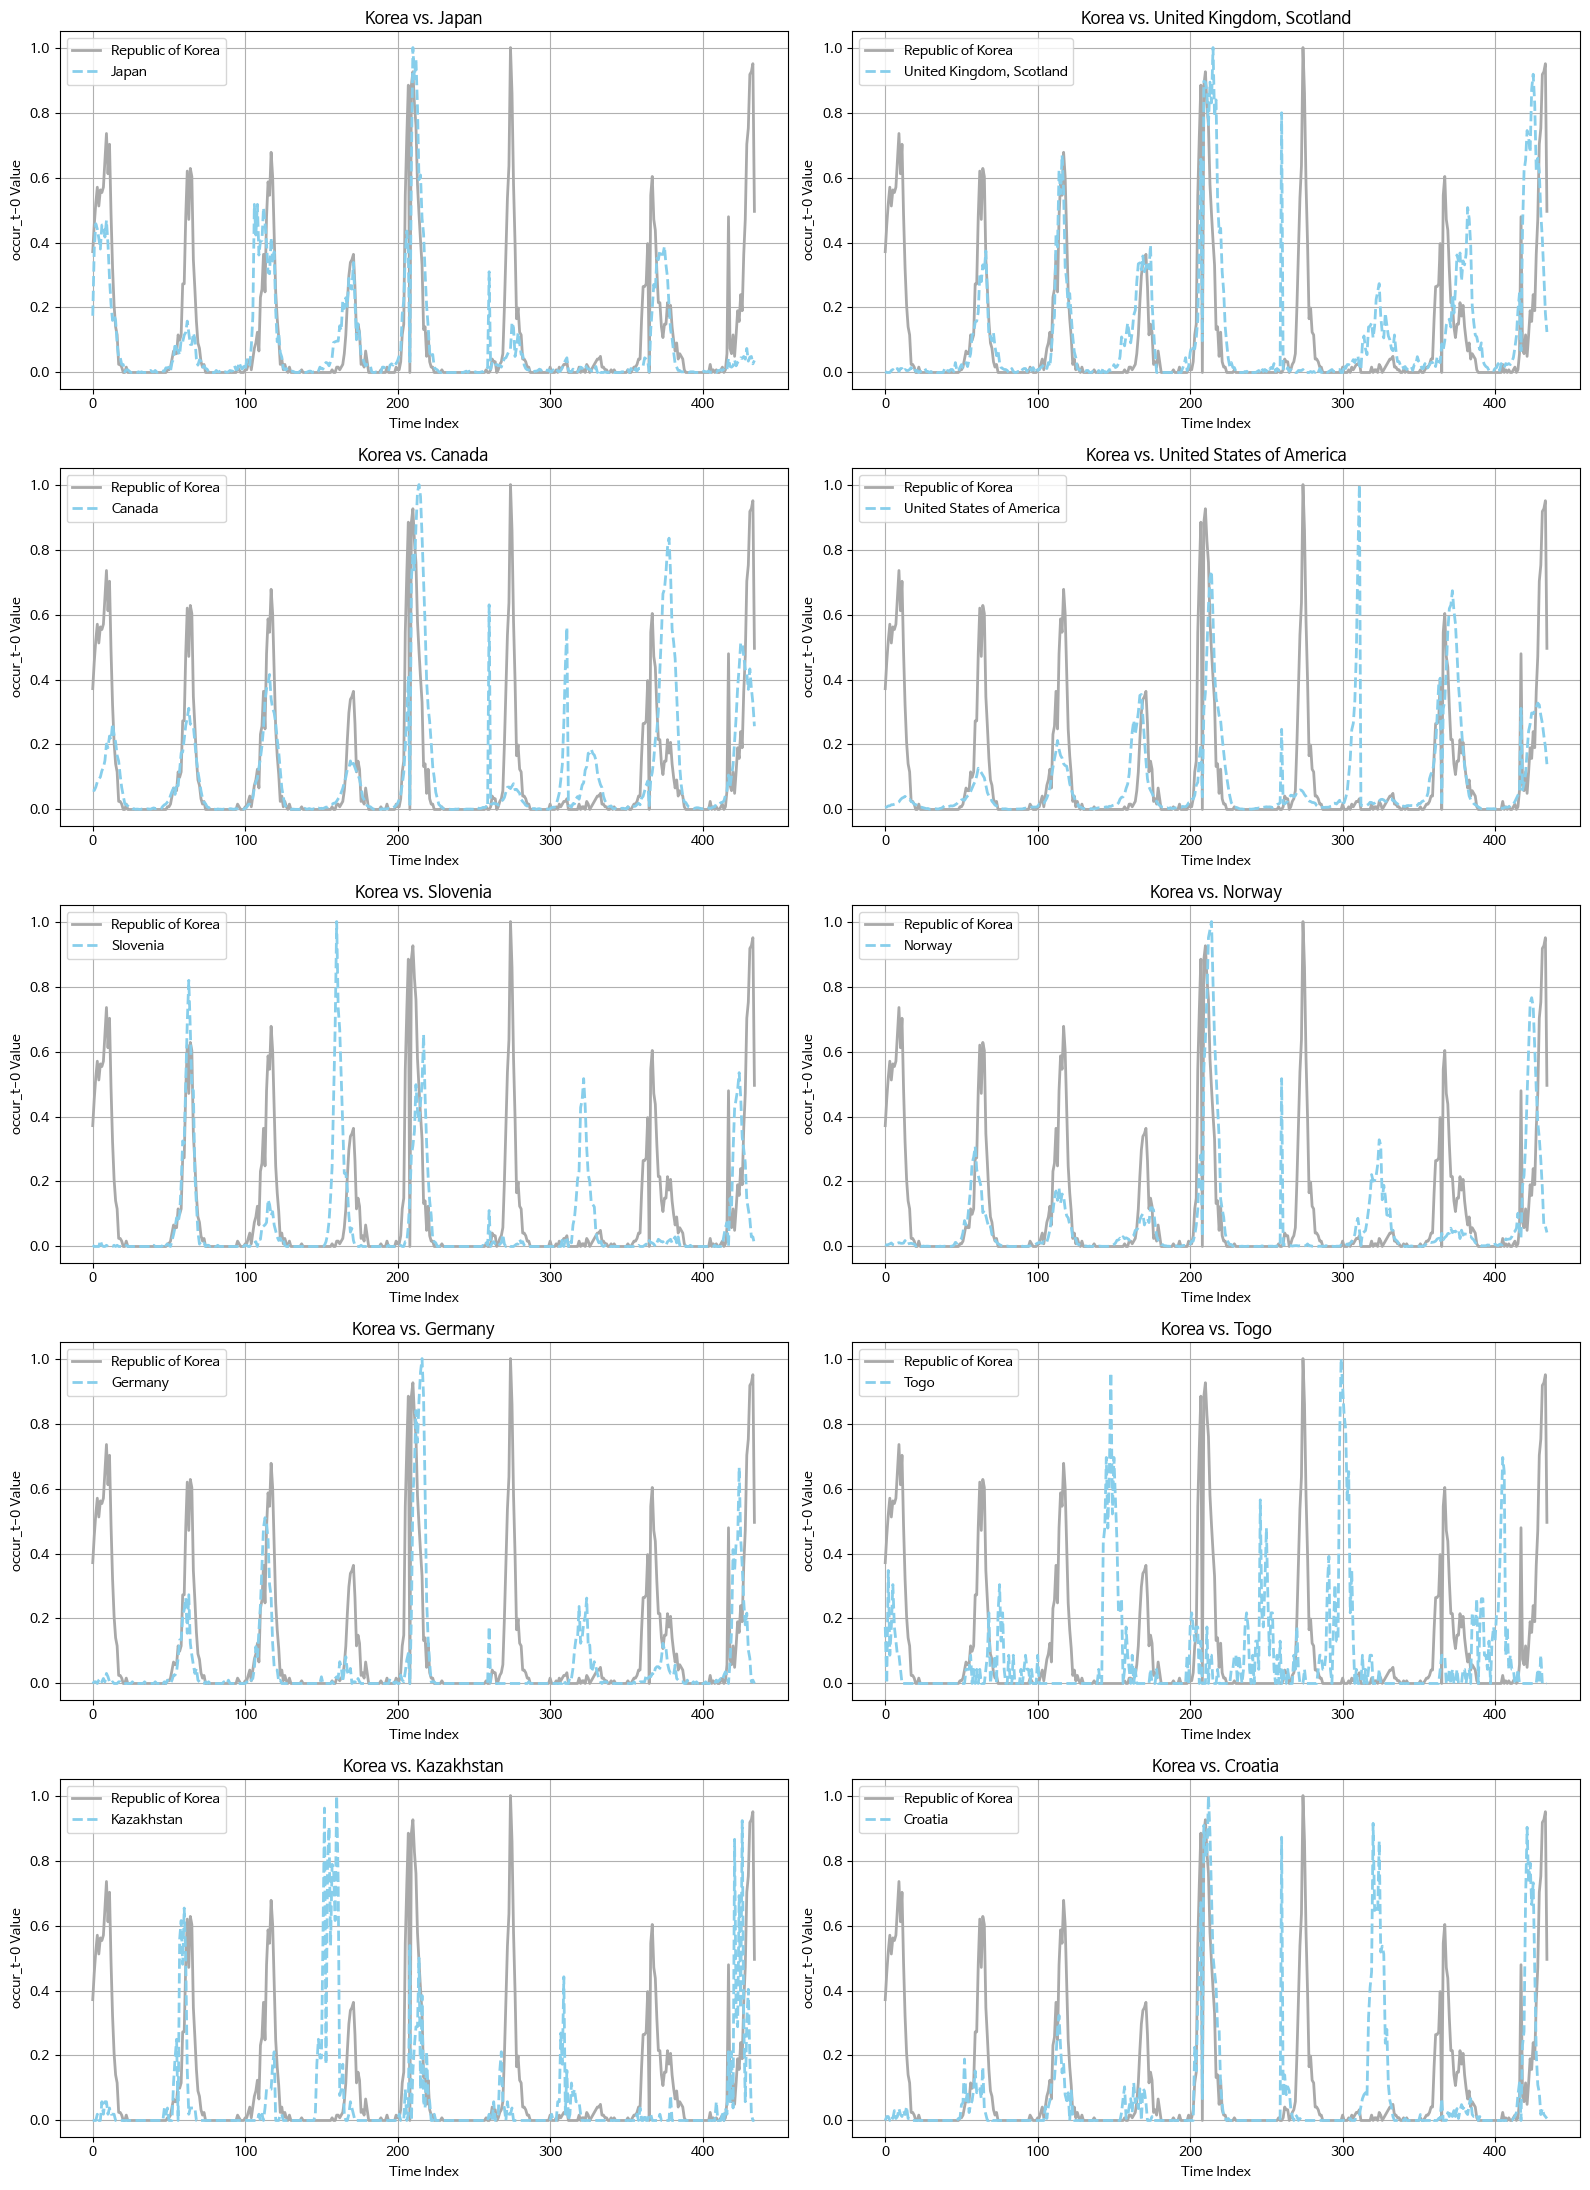

In [ ]:
top_10_countries = dtw_df.head(10).index

# 2. 시각화를 위한 5x2 서브플롯 그리드 생성
fig, axes = plt.subplots(5, 2, figsize=(16, 22))
axes = axes.flatten()

# 3. 상위 10개국에 대해 반복하며 그래프 그리기
for i, country_name in enumerate(top_10_countries):
    # 해당 국가의 시계열 데이터 가져오기
    country_series = df[df['COUNTRY'] == country_name].sort_values(by='DATE')['occur_t-0'].to_numpy()

    ax = axes[i]  # i번째 서브플롯 선택

    # 한국 시계열 플롯 (모든 그래프에서 동일하게 파란색으로 표시)
    ax.plot(korea_series, label='Republic of Korea', color='darkgray', linewidth=2)

    # 비교 대상 국가 시계열 플롯 (요청하신 skyblue 색상 사용)
    ax.plot(country_series, label=country_name, color='skyblue', linewidth=2, linestyle="--")

    ax.set_title(f'Korea vs. {country_name}') # 그래프 제목 설정
    ax.set_xlabel('Time Index')
    ax.set_ylabel('occur_t-0 Value')
    ax.legend()
    ax.grid(True)

# 그래프들이 겹치지 않도록 레이아웃 조정
plt.tight_layout()
plt.show()

## 최종 점수

In [ ]:
# 1. 코사인 유사도 계산 (lag별로 가장 높은 유사도만 추출)
def get_max_cosine_scores(df):
    results = []

    korea_vector = df[df["COUNTRY"] == "Republic of Korea"]["INF_B"].dropna().values.reshape(1, -1)
    countries = df["COUNTRY"].unique()
    countries = [c for c in countries if c != "Republic of Korea"]

    for country in countries:
        sub = df[df["COUNTRY"] == country]

        for lag in range(53):
            colname = f"occur_t-{lag}"
            if colname not in sub.columns:
                continue

            series = sub[colname].dropna().values.reshape(1, -1)
            min_len = min(korea_vector.shape[1], series.shape[1])
            if min_len < 10:
                continue

            korea_trimmed = korea_vector[0][-min_len:].reshape(1, -1)
            foreign_trimmed = series[0][-min_len:].reshape(1, -1)

            sim = cosine_similarity(korea_trimmed, foreign_trimmed)[0][0]
            results.append({"COUNTRY": country, "lag": lag, "cosine_similarity": sim})

    df_result = pd.DataFrame(results)
    return df_result.sort_values("cosine_similarity", ascending=False).groupby("COUNTRY").head(1)

cosine_df = get_max_cosine_scores(df)

# 2. DTW 거리 계산
korea_series = df[df['COUNTRY'] == 'Republic of Korea'].sort_values(by='DATE')['occur_t-0'].to_numpy()
dtw_scores = {}

for country in df['COUNTRY'].unique():
    if country == 'Republic of Korea':
        continue

    country_series = df[df['COUNTRY'] == country].sort_values(by='DATE')['occur_t-0'].to_numpy()
    if len(country_series) != len(korea_series):
        continue

    distance, _ = fastdtw(korea_series, country_series, dist=lambda x, y: abs(x - y))
    dtw_scores[country] = distance

dtw_df = pd.DataFrame.from_dict(dtw_scores, orient='index', columns=['dtw_distance']).reset_index().rename(columns={"index": "COUNTRY"})

# 3. 결합 점수 계산
merged = pd.merge(cosine_df, dtw_df, on="COUNTRY")

# DTW 정규화 (min-max)
merged['dtw_scaled'] = (merged['dtw_distance'] - merged['dtw_distance'].min()) / (merged['dtw_distance'].max() - merged['dtw_distance'].min())

# 최종 점수 계산 (동일 가중치: cosine - scaled_dtw)
merged['final_score'] = merged['cosine_similarity'] - merged['dtw_scaled']

# 정렬
merged_sorted = merged.sort_values("final_score", ascending=False)

# 결과 출력
print(merged_sorted[['COUNTRY', 'final_score']].head(20))

                             COUNTRY  final_score
0                              Japan     0.736677
2                             Canada     0.621820
4           United Kingdom, Scotland     0.577812
9           United States of America     0.425173
3                              China     0.381913
17                            Norway     0.360626
11                           Türkiye     0.358218
26                          Slovenia     0.328820
6                             Mexico     0.299608
29                           Germany     0.289506
18                Russian Federation     0.272288
21                            Sweden     0.254408
20                           Ukraine     0.253561
42                        Kazakhstan     0.250684
25                              Oman     0.243394
23                            Serbia     0.222545
16                           Ireland     0.220048
58                           Croatia     0.216822
31  United Kingdom, Northern Ireland     0.200805


In [ ]:
df2 = merged_sorted.copy()
df2.head(10)

,COUNTRY,lag,cosine_similarity,dtw_distance,dtw_scaled,final_score
0,Japan,0,0.736677,21.574575,0.000000,0.736677
2,Canada,0,0.660342,22.833219,0.038522,0.621820
4,"United Kingdom, Scotland",0,0.603473,22.412997,0.025661,0.577812
9,United States of America,0,0.563960,26.109242,0.138788,0.425173
3,China,0,0.630938,29.711060,0.249025,0.381913
17,Norway,0,0.510566,26.473626,0.149940,0.360626
11,Türkiye,1,0.562662,28.254462,0.204444,0.358218
26,Slovenia,52,0.478475,26.464304,0.149655,0.328820
6,Mexico,3,0.582267,30.810006,0.282659,0.299608
29,Germany,0,0.472714,27.560578,0.183207,0.289506


In [ ]:
df2.to_csv("country_similarity.csv", index=False)

# ARIMAX/SARIMAX

## ADF 정상성 검정

In [ ]:
window_size = 156  # 주당 3년

labels = []

for i in range(len(korea_df)):
    if i < window_size:
        labels.append(np.nan)
        continue

    window_data = korea_df.iloc[i - window_size:i]['INF_B']
    threshold = window_data.mean() + window_data.std()
    current_value = korea_df.iloc[i]['INF_B']

    if current_value > threshold:
        labels.append("유행")
    else:
        labels.append("유행 아님")

# 결과 추가 (앞부분 부족한 값까지 포함)
korea_df['유행여부'] = [np.nan]*window_size + labels[window_size:]

# 결과 일부 확인
print(korea_df[['DATE', 'INF_B', '유행여부']].tail(50))

          DATE  INF_B   유행여부
385 2024-05-19    7.0  유행 아님
386 2024-05-26    6.0  유행 아님
387 2024-06-02    5.0  유행 아님
388 2024-06-09    1.0  유행 아님
389 2024-06-16    0.0  유행 아님
390 2024-06-23    0.0  유행 아님
391 2024-06-30    0.0  유행 아님
392 2024-07-07    0.0  유행 아님
393 2024-07-14    0.0  유행 아님
394 2024-07-21    0.0  유행 아님
395 2024-07-28    0.0  유행 아님
396 2024-08-04    0.0  유행 아님
397 2024-08-11    0.0  유행 아님
398 2024-08-18    0.0  유행 아님
399 2024-08-25    0.0  유행 아님
400 2024-09-01    0.0  유행 아님
401 2024-09-08    0.0  유행 아님
402 2024-09-15    0.0  유행 아님
403 2024-09-22    0.0  유행 아님
404 2024-09-29    0.0  유행 아님
405 2024-10-06    3.0  유행 아님
406 2024-10-13    0.0  유행 아님
407 2024-10-20    1.0  유행 아님
408 2024-10-27    0.0  유행 아님
409 2024-11-03    1.0  유행 아님
410 2024-11-10    0.0  유행 아님
411 2024-11-17    0.0  유행 아님
412 2024-11-24    1.0  유행 아님
413 2024-12-01    2.0  유행 아님
414 2024-12-08    0.0  유행 아님
415 2024-12-15    1.0  유행 아님
416 2024-12-22    7.0  유행 아님
417 2024-12-29   58.0     유행
418 2025-01-05

In [ ]:
korea_df['INF_B'].describe()

,INF_B
count,435.000000
mean,13.655172
std,25.408564
min,0.000000
25%,0.000000
50%,1.000000
75%,14.000000
max,121.000000


In [ ]:
def get_percentile_summary(data, step=5):
    """
    주어진 데이터의 백분위 요약을 반환합니다.
    step: 5로 설정하면 0%, 5%, ..., 100% 구간으로 나눕니다.
    """
    percentiles = np.arange(0, 101, step)
    values = np.percentile(data, percentiles)
    summary = pd.DataFrame({'Percentile': percentiles, 'Value': values})
    return summary

# 예제 사용

summary = get_percentile_summary(korea_df['INF_B'], step=5)
print(summary)

    Percentile  Value
0            0    0.0
1            5    0.0
2           10    0.0
3           15    0.0
4           20    0.0
5           25    0.0
6           30    0.0
7           35    0.0
8           40    0.0
9           45    0.3
10          50    1.0
11          55    2.0
12          60    3.0
13          65    4.1
14          70    7.0
15          75   14.0
16          80   20.2
17          85   33.0
18          90   57.0
19          95   73.0
20         100  121.0


In [ ]:
import scipy.stats as stats
shapiro_stat, shapiro_p = stats.shapiro(korea_df['INF_B'])
print(f"Shapiro-Wilk Test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}") # ili는 정규성 X

Shapiro-Wilk Test: statistic=0.6072, p-value=0.0000


In [ ]:
from statsmodels.tsa.stattools import adfuller
# 1. 한국 데이터 필터링 (2020~2022 제외)
korea_df = df[
    (df["COUNTRY"] == "Republic of Korea") &
    (~df["YEAR"].isin([2020, 2021, 2022]))
][["DATE", "INF_B"]].copy()
korea_df["DATE"] = pd.to_datetime(korea_df["DATE"])
korea_df = korea_df.dropna().sort_values(by="DATE").reset_index(drop=True)

# 2. 시계열 시각화 함수
def plot_ts(data, color, alpha, label):
    plt.figure(figsize=(11, 5))

    # 전달받은 데이터프레임(data)에서 x축과 y축 데이터를 명확히 지정
    x_axis = data['DATE']
    y_axis = data['INF_B']

    plt.plot(x_axis, y_axis, color=color, alpha=alpha, label=label)
    plt.title("INF_B - Republic of Korea")
    plt.xlabel("Year")
    plt.ylabel("INF_B")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

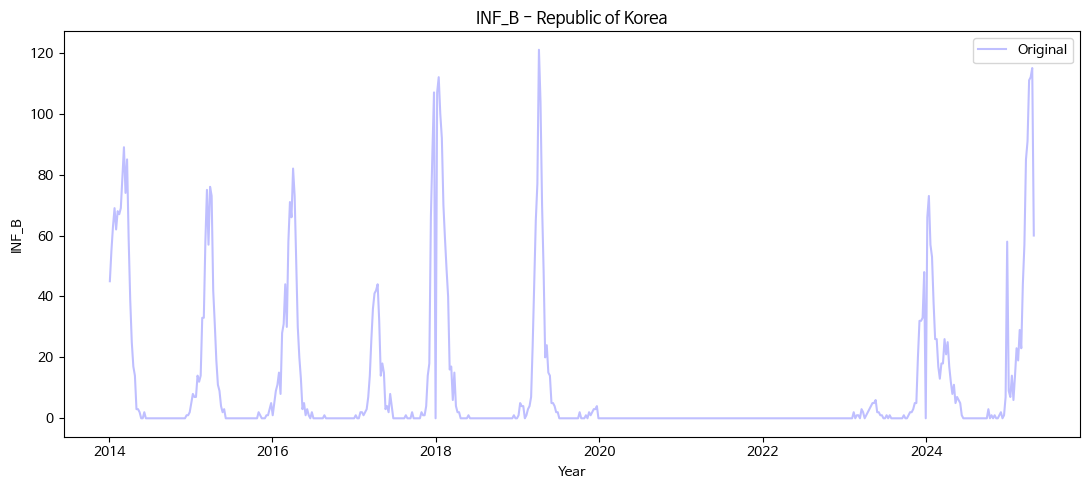

In [ ]:
plot_ts(korea_df, 'blue', 0.25, 'Original')

In [ ]:
# 3. ADF 검정 함수
def ADF_test(data):
    results = adfuller(data, autolag='AIC')
    s = results[0]
    p = results[1]
    cv = results[4]

    print('-'*30)
    print('Augmented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)

ADF_test(korea_df["INF_B"])

------------------------------
Augmented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': np.float64(-3.4456494576955485), '5%': np.float64(-2.8682850303746843), '10%': np.float64(-2.570362866414278)}
------------------------------
Test Statistics : -5.8286
p-value : 0.0000
------------------------------


**-> 정상 시계열로 판단 : d = 0**

## 계절성 분석

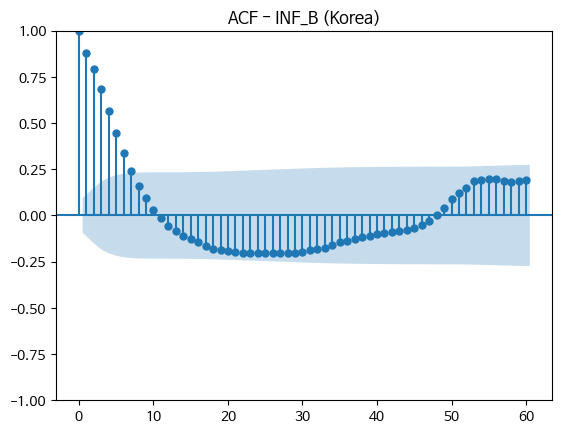

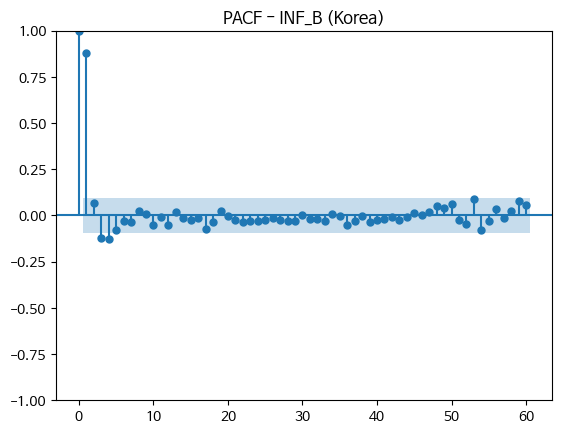

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
import pandas as pd

plot_acf(korea_df["INF_B"], lags=60)
plt.title("ACF - INF_B (Korea)")
plt.show()

plot_pacf(korea_df["INF_B"], lags=60)
plt.title("PACF - INF_B (Korea)")
plt.show()

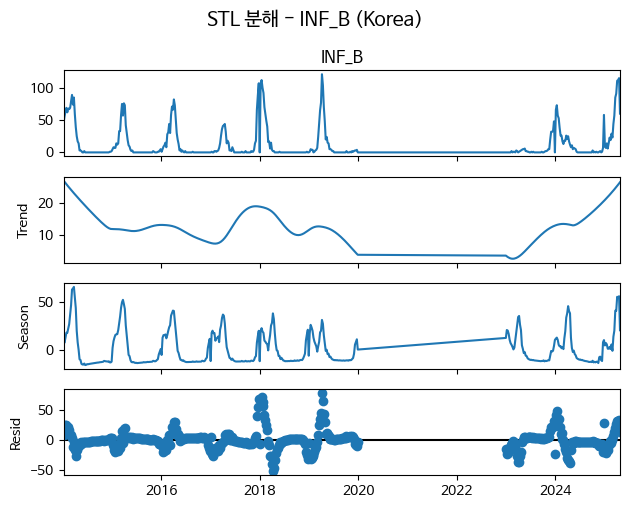

In [ ]:
# 3. STL 분해 (주간 주기: 52주)
korea_ts = korea_df.set_index("DATE")["INF_B"]
stl = STL(korea_ts, period=52)
res = stl.fit()
res.plot()
plt.suptitle("STL 분해 - INF_B (Korea)", fontsize=14, y=1.05)
plt.show()

In [ ]:
korea_df["WEEK"] = korea_df["DATE"].dt.isocalendar().week
dummies = pd.get_dummies(korea_df["WEEK"], prefix="w", drop_first=True).astype(int)

X = sm.add_constant(dummies)
y = korea_df["INF_B"]

valid_idx = y.dropna().index
model = sm.OLS(y.loc[valid_idx], X.loc[valid_idx]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  INF_B   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     4.973
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           7.98e-21
Time:                        17:16:46   Log-Likelihood:                -1911.6
No. Observations:                 435   AIC:                             3929.
Df Residuals:                     382   BIC:                             4145.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5556      6.971      3.809      0.0

## 계절성 분석 결론
---
1. ACF / PACF 해석
  ACF 그래프에서 52주 근처에서 반등, 천천히 감소하는 모습 → 계절성 존재 가능성 높음

  PACF는 1차 시점에서 뚜렷한 spike, 이후 급격히 낮아짐 → 비계절 AR(1) 가능성

  ACF가 천천히 감소하고 PACF가 빠르게 감소 → AR(1) 모형 적합 가능성

2. STL 분해 해석
  Seasonal 컴포넌트가 매우 뚜렷한 파형
    → 거의 매년 유사한 패턴을 보임
    → SARIMA에서 seasonal=True, seasonal_period=52 강력 추천

3. 회귀 결과 요약
  52개 중 약 절반 이상 주차 dummy가 유의미 (p < 0.05)
    → 통계적으로도 계절성이 존재

---
STL 분해 결과

* 계절성이 분명하게 존재

* 추세도 장기적으로 다소 존재 (약함)

PACF plot

* AR(1) 구조가 강하게 존재 (lag 1에서 뚜렷), 이후 lag은 거의 의미 없음 → 높은 차수 불필요

INF_B 데이터는 비교적 정상적

* 차분 필요성 약함 → d=0, D=1이 매우 합리적

## (p,d,q,S) 설정
---
파라미터 범위

| 파라미터          | 값 / 범위    | 설명                  |
| ------------- | --------- | ------------------- |
| `p`, `d`, `q` | (1, 0, 0) | AR(1) 구조, 차분 없이 단순화 |
| `P`, `Q`      | 0 \~ 2    | 계절 AR/MA 항 탐색       |
| `D`           | 0 또는 1    | 계절 차분 유무 모두 고려      |
| `m`           | 52        | 주간 시계열 → 52주 계절 주기  |



In [ ]:
import itertools

# 시계열로 변환
ts = korea_df.set_index('DATE')['INF_B']
ts = ts.asfreq("W")

# 고정 및 탐색 범위 설정
p, d, q = 1, 0, 0
P = [0, 1]
D = [0, 1]
Q = [0, 1]
s = 52  # 계절 주기

# 결과 저장
results = []

for seas_order in itertools.product(P, D, Q):
    try:
        model = sm.tsa.SARIMAX(ts,
                               order=(p, d, q),
                               seasonal_order=(seas_order[0], seas_order[1], seas_order[2], s),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        fit = model.fit(disp=False)
        results.append({
            'seasonal_order': (seas_order[0], seas_order[1], seas_order[2], s),
            'aic': fit.aic
        })
    except Exception as e:
        continue

# 정리
results_df = pd.DataFrame(results).sort_values(by='aic')

In [ ]:
results_df

,seasonal_order,aic
2,"(0, 1, 0, 52)",2619.529463
3,"(0, 1, 1, 52)",2665.990050
7,"(1, 1, 1, 52)",2668.892405
6,"(1, 1, 0, 52)",2757.753194
1,"(0, 0, 1, 52)",3010.248247
4,"(1, 0, 0, 52)",3010.281556
5,"(1, 0, 1, 52)",3012.234599
0,"(0, 0, 0, 52)",3380.902833


### 최종 파라미터
---
* order = (1, 0, 0), seasonal_order = (0, 1, 0, 52)

* 학습 데이터:
  2014 ~ 2019년 + 2023년 + 2024년 1 ~ 11월만 사용
    → 2020~2022년은 완전히 제외

* 예측 구간:
2024년 12월 ~ 2025년 4월 (대략 20주)



## fitting, predict

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# --- 1. 데이터 준비 및 필터링 ---
korea_df.set_index("DATE", inplace=True)


# --- 2. 훈련 / 테스트 데이터 분리  ---
# 2020년 이전 데이터를 훈련 세트로, 2023년 이후 데이터를 테스트 세트로 사용
train_df = korea_df[korea_df.index < '2020-01-01']
test_df = korea_df[korea_df.index >= '2023-01-01']

# 훈련 데이터에 주간 빈도(frequency)를 명시적으로 설정
train_ts = train_df['INF_B'].asfreq('W')
test_ts = test_df['INF_B']

In [ ]:
# --- 3. SARIMAX 모델 학습 ---
model = sm.tsa.SARIMAX(
    train_ts,
    order=(1, 0, 0),
    seasonal_order=(0, 1, 0, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)


# --- 4. 예측 수행 ---
# 테스트 데이터 기간에 맞춰 예측 시작과 끝 지점 설정
forecast_start = test_ts.index.min()
forecast_end = test_ts.index.max()

# get_prediction을 사용하여 특정 기간 예측
pred = results.get_prediction(start=forecast_start, end=forecast_end)
forecast_mean = pred.predicted_mean
forecast_ci = pred.conf_int()


# --- 5. 예측 정확도 평가 ---
# 실제값(test_ts)과 예측값(forecast_mean)으로 평가지표 계산
actual = test_ts
predicted = forecast_mean

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print("--- 예측 성능 평가지표 ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

--- 예측 성능 평가지표 ---
Mean Absolute Error (MAE): 16.1311
Mean Squared Error (MSE): 875.6066
Root Mean Squared Error (RMSE): 29.5906
R-squared: -0.4437


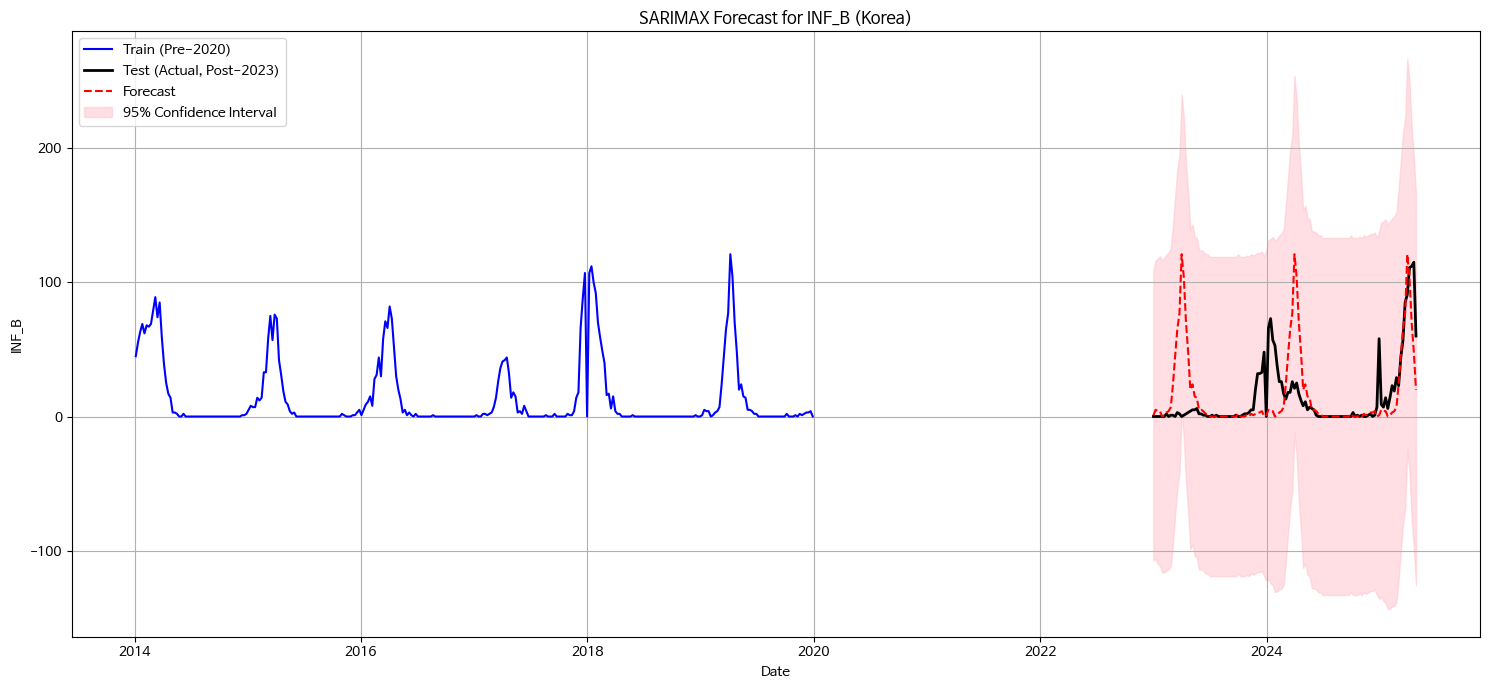

In [ ]:
# --- 6. 최종 시각화 ---
plt.figure(figsize=(15, 7))

# 훈련 데이터, 실제 테스트 데이터 플롯
plt.plot(train_ts.index, train_ts, label="Train (Pre-2020)", color="blue")
plt.plot(test_ts.index, test_ts, label="Test (Actual, Post-2023)", color="black", linewidth=2)

# 예측값과 신뢰구간 플롯
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red", linestyle='--')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.5, label="95% Confidence Interval")

plt.title("SARIMAX Forecast for INF_A (Korea)")
plt.xlabel("Date")
plt.ylabel("INF_B")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**-> 매우 안좋은 성능...**

## 외생변수 추가

* 다른 나라의 시계열(occur_t-0)을 외생변수로 활용 (lag 고려)

* 국가별 유사도 지표를 바탕으로 외생변수 선택 우선순위 정렬

* 변수를 하나씩 추가하면서 SARIMAX를 점진적으로 확장

* 외생변수의 유의성 (p-value < 0.05) 확인


* 예측 정확도(RMSE) 개선 여부 확인

위 조건을 만족하는 나라만 누적적으로 추가





In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. 기본 데이터 준비 ---
korea_df = df[df['COUNTRY'] == 'Republic of Korea'][['DATE', 'INF_B']].copy()
korea_df['DATE'] = pd.to_datetime(korea_df['DATE'])
korea_df.set_index('DATE', inplace=True)
korea_ts = korea_df['INF_B'].asfreq('W')

# 2020-2022년 제외
years_to_exclude = [2020, 2021, 2022]
korea_ts = korea_ts[~korea_ts.index.year.isin(years_to_exclude)]

# 훈련/테스트 분리
train_ts = korea_ts[korea_ts.index < '2020-01-01']
test_ts = korea_ts[korea_ts.index >= '2023-01-01']

# --- 2. 0단계: 한국 데이터만으로 기본 모델 ---
print("--- 0단계: 한국 데이터만으로 기본 SARIMAX 모델 ---")
baseline_model = sm.tsa.SARIMAX(
    endog=train_ts,
    order=(1, 0, 0),
    seasonal_order=(0, 1, 0, 52)
)
baseline_results = baseline_model.fit(disp=False)

# 기본 모델 예측
baseline_forecast = baseline_results.get_forecast(steps=len(test_ts))
baseline_predicted = baseline_forecast.predicted_mean
baseline_rmse = np.sqrt(mean_squared_error(test_ts, baseline_predicted))

print(f"기본 모델 RMSE: {baseline_rmse:.4f}")

# --- 3. 점진적 외생변수 추가 ---
best_rmse = baseline_rmse
best_model_summary = baseline_results.summary()
selected_countries = []
current_exog_train = pd.DataFrame(index=train_ts.index)
current_exog_test = pd.DataFrame(index=test_ts.index)

top_countries = df2.head(10)

for i, row in top_countries.iterrows():
    country = row['COUNTRY']
    lag = int(row['lag'])

    print(f"\n--- {i+1}단계: '{country}' (lag={lag}) 추가 ---")

    # 새로운 외생변수 준비
    exog_data = df[df['COUNTRY'] == country][['DATE', 'INF_B']].copy()
    exog_data['DATE'] = pd.to_datetime(exog_data['DATE'])
    exog_data.set_index('DATE', inplace=True)
    exog_ts = exog_data['INF_B'].asfreq('W').shift(lag)

    # 기존 외생변수에 새 변수 추가
    new_exog_train = current_exog_train.copy()
    new_exog_test = current_exog_test.copy()

    new_exog_train[country] = exog_ts.reindex(train_ts.index)
    new_exog_test[country] = exog_ts.reindex(test_ts.index)

    # 결측치 처리
    new_exog_train.fillna(method='ffill', inplace=True)
    new_exog_train.fillna(method='bfill', inplace=True)
    new_exog_test.fillna(method='ffill', inplace=True)
    new_exog_test.fillna(method='bfill', inplace=True)

    # 모델 학습
    model = sm.tsa.SARIMAX(
        endog=train_ts,
        exog=new_exog_train,
        order=(1, 0, 0),
        seasonal_order=(0, 1, 0, 52)
    )
    results = model.fit(disp=False)

    # 예측
    forecast = results.get_forecast(steps=len(test_ts), exog=new_exog_test)
    predicted = forecast.predicted_mean

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(test_ts, predicted))
    r2 = r2_score(test_ts, predicted)

    print(f"현재 조합 RMSE: {rmse:.4f}, R²: {r2:.4f}")

    # 성능 개선 여부 판단
    if rmse < best_rmse:
        print(f"성능 개선! (이전: {best_rmse:.4f} → 현재: {rmse:.4f})")
        best_rmse = rmse
        best_model_summary = results.summary()
        selected_countries.append(country)
        current_exog_train = new_exog_train.copy()
        current_exog_test = new_exog_test.copy()
    else:
        print(f"성능 개선 없음. '{country}' 제외하고 이전 단계가 최적.")
        break

# --- 최종 결과 ---
print("\n" + "="*50)
print("최종 결과")
print("="*50)
print(f"선택된 외생변수 국가: {selected_countries}")
print(f"최종 RMSE: {best_rmse:.4f}")
print(f"기본 모델 대비 개선: {((baseline_rmse - best_rmse) / baseline_rmse * 100):.2f}%")
print("\n--- 최종 모델 요약 ---")
print(best_model_summary)

--- 0단계: 한국 데이터만으로 기본 SARIMAX 모델 ---
기본 모델 RMSE: 29.5906

--- 1단계: 'Japan' (lag=0) 추가 ---
현재 조합 RMSE: 29.1655, R²: -0.4025
성능 개선! (이전: 29.5906 → 현재: 29.1655)

--- 3단계: 'Canada' (lag=0) 추가 ---
현재 조합 RMSE: 32.4021, R²: -0.7310
성능 개선 없음. 'Canada' 제외하고 이전 단계가 최적.

최종 결과
선택된 외생변수 국가: ['Japan']
최종 RMSE: 29.1655
기본 모델 대비 개선: 1.44%

--- 최종 모델 요약 ---
                                     SARIMAX Results                                      
Dep. Variable:                              INF_B   No. Observations:                  313
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 52)   Log Likelihood               -1017.332
Date:                            Thu, 10 Jul 2025   AIC                           2040.665
Time:                                    17:43:07   BIC                           2051.358
Sample:                                01-05-2014   HQIC                          2044.963
                                     - 12-29-2019                                         
Covariance Type:   

# SARIMAX 결론
---

```
사용 불가
```


| 요인         | 설명                                             |
| ---------- | ---------------------------------------------- |
| **데이터 단절** | 2020\~2022년 제거 → 시계열의 연속성 상실                   |
| **구조적 변화** | 팬데믹 이후 행동 양식, 계절성, 위생 등이 모두 달라짐                |
| **모델 한계**  | SARIMAX는 선형 추세 + 고정된 계절 패턴 가정 → 변화에 둔감         |
| **결과**     | 테스트 시기(2023\~2025) 예측이 과거에 비해 현저히 부정확 (R² < 0) |
